# Mattermost Lunch Channel History

- Data Source: [Mattermost API](https://api.mattermost.com/), [CCTB instance](https://cctb-intern.biologie.uni-wuerzburg.de/)
- Tasks:
	- Part I - June 2024: retrieving chat history data through the mattermost API
	- Part II - September 2024: analyzing messages in the lunch channel
	- Part III - September 2024: specific tasks
- Language: [R](https://www.r-project.org/)

## Select one of the following tasks

> General comment: your estimate in step 1 does not need to be perfect, settle for a heuristic that is good enough

### Task A - most crowded day of the week
- estimate the total number of people having lunch (or coffee) at the CCTB/mensa for each day → when was the time that most people went to lunch?
- plot the number of people per day over time (also try to summarize by week/month/year)
- plot a boxplot for the number of people per day of the week → what is the most crowded day of the week?
- make the same plot as above, but separately for every month/year → is there a shift in day of the week preference?
- perform a statistical test for the hypothesis: "Mondays and Fridays are less crowded than Tuesday and Thursday"
- discuss caveats of the data and methods used

### Task B - lunch time
- estimate the time of lunch/coffee for each day → when was the most popular time?
    - try to consider proposed times ("mensa at 12?", "11:15?")
    - direct calls ("mensa?", "now")
    - relative times ("lunch in 5min", "mensa in half an hour?")
- plot the lunch time over the years (also try to summarize by week/month/year) → is there a trend (gradual shift or break point(s)) in lunch time?
- plot a boxplot for the lunch time per day of the week → is there a difference in lunch time per day of the week?
- make the same plot as above, but separately for every month/year → is the pattern above consistent over the year(s)?
- perform a statistical test for the hypothesis: "Lunch time is later during semester break (April,May,August,September) than during lecture period since 2022"
- discuss caveats of the data and methods used

### Task C - your own idea
If you have other ideas, feel free to follow them, but create a plan similar to that for Task A and B above, before you start.

In [3]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
theme_set(theme_light())

In [5]:
set.seed(42)
"Sabine Jana Sascha Mike Markus" %>%  str_split(" ") %>% unlist %>% sample %>% str_c(collapse=" → ")

[1] "Sabine → Markus → Mike → Sascha → Jana"

## 1. Data loading

Load files:
- `messages.csv`
- `reactions.csv`
- `files.csv`

In [6]:
messages <- read_csv("messages.csv")
reactions <- read_csv("reactions.csv")
files <- read_csv("files.csv")

Rows: 6947 Columns: 6


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): post_id, message, username
dbl  (2): num_reactions, num_files
dttm (1): create_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 3634 Columns: 5


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): post_id, emoji_name, username, emoji
dttm (1): create_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 221 Columns: 3


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): post_id, file_id, link



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Task A

As result, we want a table of the form
| day of the week | number of people |
|------------------------|--------------------------|
| Monday | 10 |
| Tuesday | 11 |

In [76]:
messages %>% head

post_id,create_at,message,username,num_reactions,num_files
<chr>,<dttm>,<chr>,<chr>,<dbl>,<dbl>
h957oi1t63rf5b6p4pqfhiis5h,2016-05-02 12:02:13,Also ich habe etwas dabei,greatfireball,0,0
rpwuii8hci8ezmn3d41u9d58fc,2016-05-02 12:03:02,ich gehe mir jetzt was holen,nterhoeven,0,0
e8bnwq8c7fdf5k7zpqyeihougr,2016-05-02 12:03:24,Alles klar,greatfireball,0,0
sku34dhpntdfdmc5d9ky9a9yso,2016-05-02 12:20:33,Hallo @joerg,greatfireball,0,0
hi38ssjpb3yqz88dk83tzjq5zr,2016-05-02 12:20:35,Essen?,greatfireball,0,0
dux74xuq738u38z384wg8mri1e,2016-05-02 12:20:36,:smile:,greatfireball,0,0


In [77]:
reactions %>% head

post_id,create_at,emoji_name,username,emoji
<chr>,<dttm>,<chr>,<chr>,<chr>
ng3m9o5c5igw3gpgg1dqmgs4mw,2017-08-18 11:57:23,+1,lulei,👍
atnyf76f1tb1fmznhrk4s3wohr,2017-08-21 11:50:04,+1,sonja,👍
atnyf76f1tb1fmznhrk4s3wohr,2017-08-21 11:52:22,+1,iimog,👍
eh5ge6nnf7np5q61rqpfwhmqaw,2017-08-23 11:24:45,+1,sonja,👍
eh5ge6nnf7np5q61rqpfwhmqaw,2017-08-23 11:26:44,+1,alexanderkeller,👍
eh5ge6nnf7np5q61rqpfwhmqaw,2017-08-23 11:49:19,+1,t.paul,👍


In [16]:
reaction_users_per_day <- reactions %>%
    filter(year(create_at) >= 2022) %>%
    mutate(day = floor_date(create_at, "day")) %>%
    select(day, username) %>% 
    unique()

In [19]:
message_users_per_day <- messages %>%
    filter(year(create_at) >= 2022) %>%
    mutate(day = floor_date(create_at, "day")) %>%
    select(day, username) %>% 
    unique()

In [78]:
message_users_per_day %>% head

day,username
<dttm>,<chr>
2022-01-04,iimog
2022-01-04,art
2022-01-04,andreaskuhn
2022-01-05,andreaskuhn
2022-01-10,simon.schardt
2022-01-11,jscabral


In [29]:
users_per_day <- full_join(reaction_users_per_day,message_users_per_day,by=c("day","username"))

In [30]:
library(lubridate)

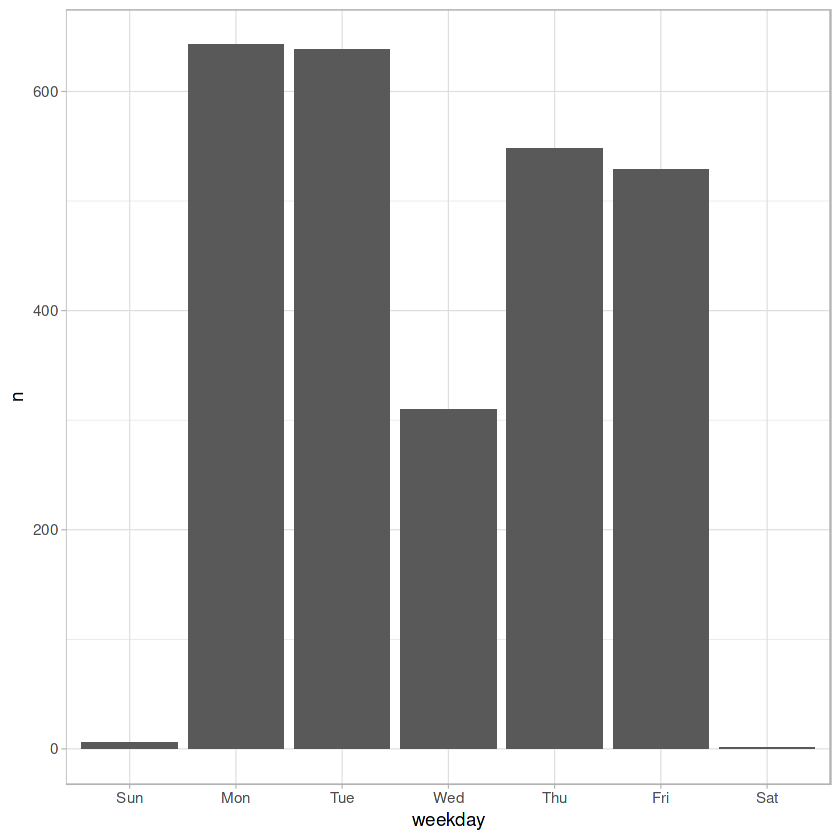

In [39]:
users_per_day %>%
    mutate(weekday = wday(day, label=TRUE)) %>%
    count(weekday) %>%
    ggplot(aes(x=weekday, y=n)) + geom_col()


In [44]:
counts_per_wday <- users_per_day %>%
    count(day) %>%
    mutate(weekday = wday(day, label=TRUE))

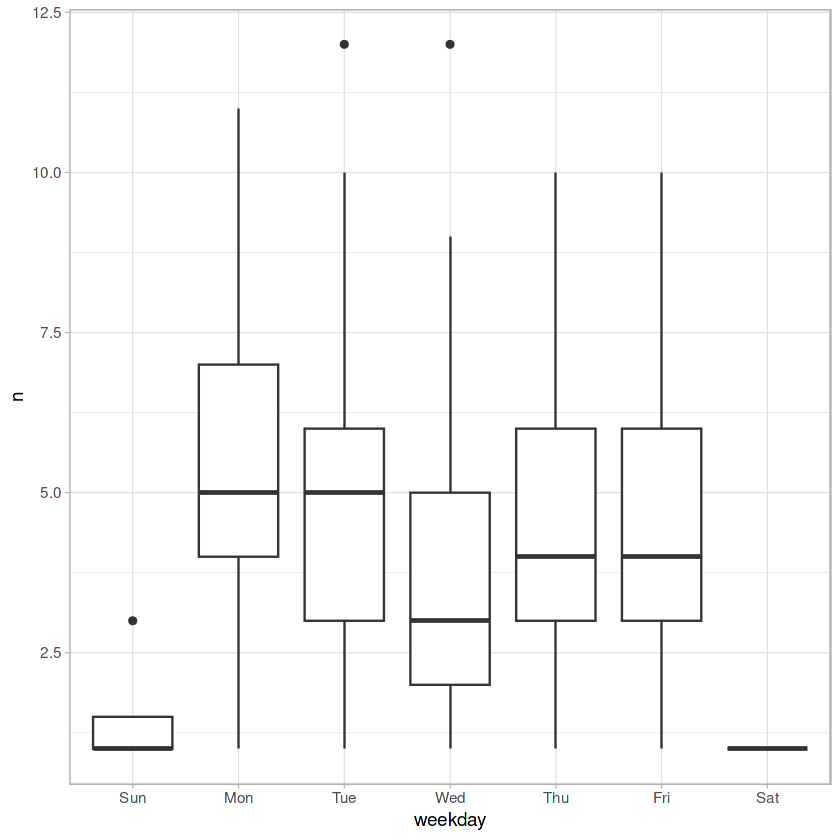

In [45]:
counts_per_wday %>%
    ggplot(aes(x=weekday, y=n)) + geom_boxplot()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


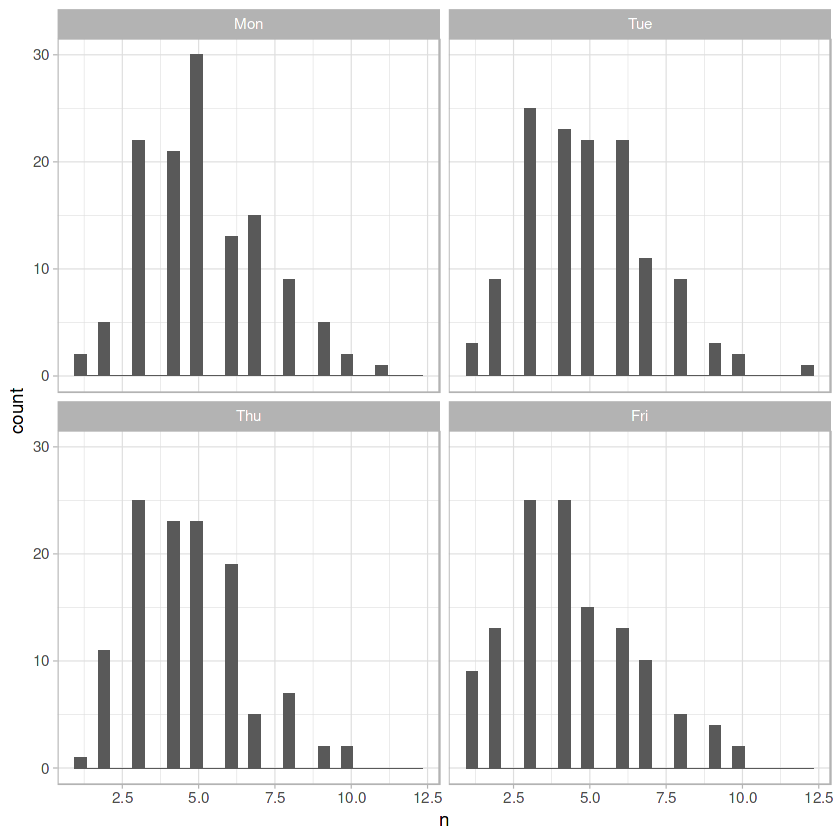

In [52]:
counts_per_wday %>%
    filter(weekday %in% c("Mon", "Tue", "Thu", "Fri")) %>%
    ggplot(aes(x=n)) + geom_histogram() + facet_wrap(~weekday)

In [74]:
mean_var_per_wday <- counts_per_wday %>% 
    filter(weekday %in% c("Mon", "Tue", "Thu", "Fri")) %>%
    group_by(weekday) %>%
    summarise(median= median(n),mean = mean(n), var = var(n), n = n()) 

In [75]:
mean_var_per_wday

weekday,median,mean,var,n
<ord>,<dbl>,<dbl>,<dbl>,<int>
Mon,5,5.144000,4.059742,125
Tue,5,4.907692,4.223971,130
Thu,4,4.644068,3.479067,118
Fri,4,4.371901,4.585537,121


In [64]:
monday <- counts_per_wday %>%
    filter(weekday == "Mon")
tuesday <- counts_per_wday %>%
    filter(weekday == "Tue")
thursday <- counts_per_wday %>%
    filter(weekday == "Thu")
friday <- counts_per_wday %>%
    filter(weekday == "Fri")

Our Bonferroni-corrected significance level:

In [72]:
0.05/6

[1] 0.008333333

In [65]:
library(stats)
wilcox.test(monday$n, tuesday$n, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  monday$n and tuesday$n
W = 8667.5, p-value = 0.3514
alternative hypothesis: true location shift is not equal to 0


In [66]:
wilcox.test(thursday$n, friday$n, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  thursday$n and friday$n
W = 7797.5, p-value = 0.2124
alternative hypothesis: true location shift is not equal to 0


In [67]:
wilcox.test(monday$n, friday$n, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  monday$n and friday$n
W = 9229, p-value = 0.002527
alternative hypothesis: true location shift is not equal to 0


In [68]:
wilcox.test(tuesday$n, friday$n, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  tuesday$n and friday$n
W = 9069.5, p-value = 0.03412
alternative hypothesis: true location shift is not equal to 0


In [69]:
wilcox.test(monday$n, thursday$n, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  monday$n and thursday$n
W = 8427.5, p-value = 0.05149
alternative hypothesis: true location shift is not equal to 0


In [71]:
wilcox.test(tuesday$n, thursday$n, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  tuesday$n and thursday$n
W = 8237, p-value = 0.3089
alternative hypothesis: true location shift is not equal to 0
